In [1]:
import pandas as pd
import json
import os

# scraped perfume

In [2]:
#all perfumes
paths = os.listdir('perfumes')
docs = []
for path in paths:
    with open(f'perfumes/{path}','r') as r:
        p = json.load(r)
    pyramid = p['pyramid']
    p_keys = list(pyramid.keys())
    for py in p_keys:
        # preprocess notes label
        for note in [
        'Watery-notes','Water-notes','Green-notes','Powdery-notes','Top-notes','Woodsy-notes','Middle-notes','Sea-notes','Spicy-notes',
 'Sweet-notes','Fragrance-notes','Base-notes','Herbal-notes','Floral-notes','Woody-notes','Earthy-notes','Fruity-notes']:
            if note in py:
                pyramid[note] = pyramid[py]
                if not (note == py):
                    del pyramid[py]
    accords = {'accord-'+a['text']:a['width'] for a in p['accords_detail']}
    doc = dict(
        href=p['href'],
        year=p['year'],
        review=p['review_clean'],
        accords=accords,
        **pyramid,
    )
    docs.append(doc)
scraped_perfume = pd.DataFrame(docs)
scraped_perfume.head(2)

,href,year,review,accords,Top-notes,Middle-notes,Base-notes,Fragrance-notes,Green-notes,Woody-notes,...,Fruity-notes,Spicy-notes,Sweet-notes,Woodsy-notes,Watery-notes,Water-notes,Powdery-notes,Herbal-notes,Floral-notes,Earthy-notes
0,/perfume/Abercrombie-Fitch/Fierce-3508.html,2002,418,"{'accord-aromatic': '100', 'accord-woody': '97...","[Fir, Lemon, Orange, Petitgrain, Cardamom]","[Rosemary, Lily-of-the-, Valley, Jasmine, Rose...","[Musk, Vetiver, Oakmoss, Brazilian , Rosewood,...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/perfume/Adam-Levine/Adam-Levine-for-Women-174...,2013,445,"{'accord-warm spicy': '100', 'accord-woody': '...","[Spices, Marigold, Saffron, Citruses]","[Australian , Sandalwood, Indian , Jasmine, Ro...","[Vanila, Benzoin]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
scraped_perfume.columns

Index(['href', 'year', 'review', 'accords', 'Top-notes', 'Middle-notes',
       'Base-notes', 'Fragrance-notes', 'Green-notes', 'Woody-notes',
       'Sea-notes', 'Fruity-notes', 'Spicy-notes', 'Sweet-notes',
       'Woodsy-notes', 'Watery-notes', 'Water-notes', 'Powdery-notes',
       'Herbal-notes', 'Floral-notes', 'Earthy-notes'],
      dtype='object')

# perfume data

In [4]:
# popular perfumes
with open("perfumes.json", "r") as r:
    df_perfumes_sample = json.load(r)
df_perfumes_sample = pd.DataFrame(df_perfumes_sample)
df_perfumes_sample.head(2)

,href,year,review_clean
0,/perfume/Nasomatto/Black-Afgano-6472.html,0,598
1,/perfume/Chanel/Les-Exclusifs-de-Chanel-Coroma...,0,424


# nose

In [5]:
# person who make perfume
df_nose = pd.read_json('nose.json')
df_nose.head(2)

,title,href,name,review,nose,review_clean,year
0,-DIS DIS-1 (Decay) unisex 2020,/perfume/DIS/DIS-1-Decay-64356.html,DIS-1 (Decay)\n\n,\n,%C3%96mer_Ipek%C3%A7i,0,2020
1,-DIS DIS-2 (Concrete) unisex 2020,/perfume/DIS/DIS-2-Concrete-64357.html,DIS-2 (Concrete)\n\n,\n,%C3%96mer_Ipek%C3%A7i,0,2020


In [6]:
df_nose['gender'] = df_nose.title.apply(lambda x: x.split(' ')[-2])

In [7]:
df_nose['brand'] = df_nose.href.apply(lambda x: x.split('/')[2])

In [34]:
df_nose['name_clean'] = df_nose.name.str.replace('\n\n','')

# join

In [ ]:
#name, brand, year, nose, gender, review, notes, accord


In [21]:
#scraped_perfume,df_perfumes_sample,df_nose
df = pd.merge(left=scraped_perfume,right=df_perfumes_sample,how='inner',right_on=['href','year'],left_on=['href','year'])
df = pd.merge(left=df,right=df_nose,how='inner',right_on=['href','year','review_clean'],left_on=['href','year','review_clean'])
df.columns

Index(['href', 'year', 'review_x', 'accords', 'Top-notes', 'Middle-notes',
       'Base-notes', 'Fragrance-notes', 'Green-notes', 'Woody-notes',
       'Sea-notes', 'Fruity-notes', 'Spicy-notes', 'Sweet-notes',
       'Woodsy-notes', 'Watery-notes', 'Water-notes', 'Powdery-notes',
       'Herbal-notes', 'Floral-notes', 'Earthy-notes', 'review_clean', 'title',
       'name', 'review_y', 'nose', 'gender', 'brand'],
      dtype='object')

# Popular Perfume

In [59]:
popular_perfume = df.groupby(['year','name','brand','gender'])['review_clean'].max().to_frame().reset_index().sort_values(['year','review_clean'], ascending=False)
popular_perfume.head(5)

,year,name,brand,gender,review_clean
1088,2023,Harvest Mouse\n\n,Zoologist-Perfumes,unisex,11
1098,2023,Purpose\n\n,Amouage,unisex,9
1089,2023,Island Lush\n \n,Goldfield-Banks-Australia,unisex,5
1092,2023,La Nuit Trésor Fleur de Nuit\n\n,Lancome,female,4
1101,2023,VI\n\n,VLH,unisex,4


In [60]:
popular_perfume['name'] = popular_perfume.name.str.replace('\n','')
popular_perfume.head(10)

,year,name,brand,gender,review_clean
1088,2023,Harvest Mouse,Zoologist-Perfumes,unisex,11
1098,2023,Purpose,Amouage,unisex,9
1089,2023,Island Lush,Goldfield-Banks-Australia,unisex,5
1092,2023,La Nuit Trésor Fleur de Nuit,Lancome,female,4
1101,2023,VI,VLH,unisex,4
1085,2023,CH Pasión for Him,Carolina-Herrera,male,3
1090,2023,L'Eau Papier,Diptyque,unisex,3
1091,2023,L'Iris de Fath Eau de Parfum,Jacques-Fath,unisex,3
1097,2023,Narcisse,Fragonard,female,3
1087,2023,Guidance,Amouage,unisex,2


In [64]:
male_popular_perfume = popular_perfume.sort_values('review_clean',ascending=False).loc[popular_perfume.gender=='male'].head(10)
female_popular_perfume = popular_perfume.sort_values('review_clean',ascending=False).loc[popular_perfume.gender=='female'].head(10)
unisex_popular_perfume = popular_perfume.sort_values('review_clean',ascending=False).loc[popular_perfume.gender=='unisex'].head(10)

In [363]:
import matplotlib.pyplot as plt
import seaborn as sns


In [258]:
def draw_bar(df,x,y,title,xlabel,ylabel,annotation=None,annotation_position=100):
    sns.set_style('darkgrid')

    ax = sns.barplot(data=df,x=x,y=y,)
    plt.gcf().set_size_inches(4, 6, forward=True)
    plt.gcf().set_dpi(150)

    if annotation:
        for bar,label in zip(ax.patches, df[annotation]):
            ax.annotate(label,
                        (bar.get_x() + annotation_position, bar.get_y() + 0.7),
                        # (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                        ha='left', va='center',
                        xytext=(0, 9),
                        textcoords='offset points')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    plt.show()

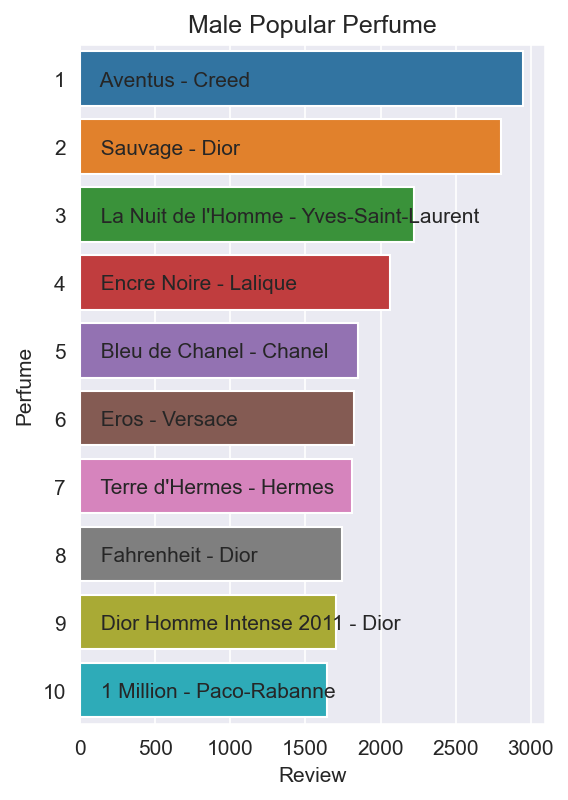

In [157]:
male_popular_perfume['no'] = [str(x) for x in range(1,11)]
male_popular_perfume['label'] = male_popular_perfume.name + ' - ' + male_popular_perfume.brand
draw_bar(male_popular_perfume,'review_clean','no','Male Popular Perfume','Review','Perfume','label')

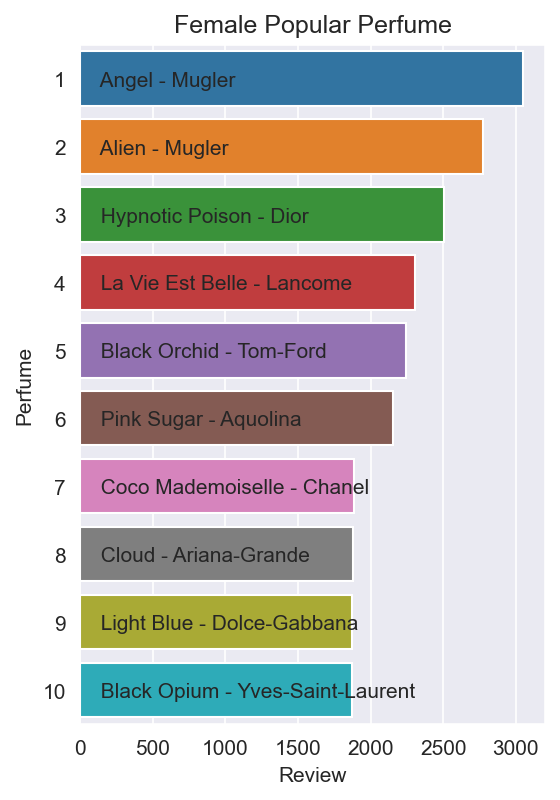

In [158]:
female_popular_perfume['no'] = [str(x) for x in range(1,11)]
female_popular_perfume['label'] = female_popular_perfume.name + ' - ' + female_popular_perfume.brand
draw_bar(female_popular_perfume,'review_clean','no','Female Popular Perfume','Review','Perfume','label')

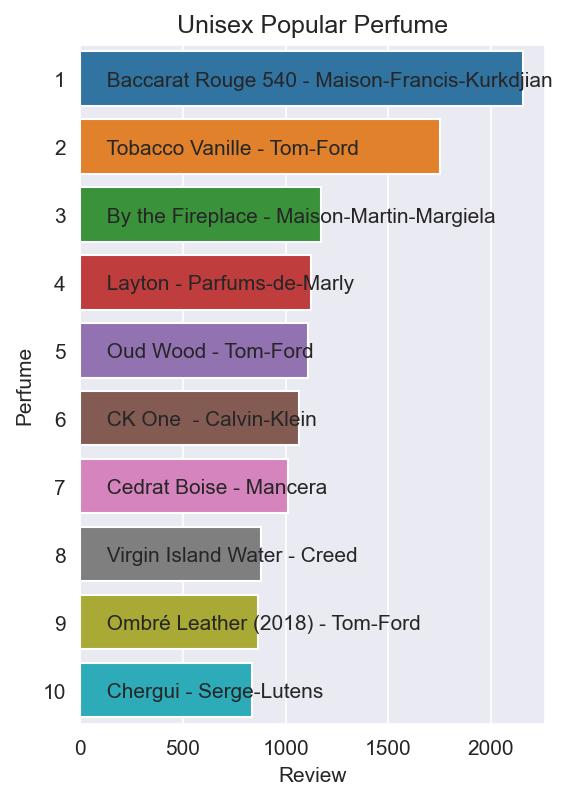

In [159]:
unisex_popular_perfume['no'] = [str(x) for x in range(1,11)]
unisex_popular_perfume['label'] = unisex_popular_perfume.name + ' - ' + unisex_popular_perfume.brand
draw_bar(unisex_popular_perfume,'review_clean','no','Unisex Popular Perfume','Review','Perfume','label')


# Popular Brand

In [162]:
brand_perf = df[['brand','name','year','review_clean','gender']]
brand_perf['name'] = brand_perf.name.str.replace('\n','')

<ipython-input-162-357637d63d5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_perf['name'] = brand_perf.name.str.replace('\n','')


,brand,name,year,review_clean,gender
0,Abercrombie-Fitch,Fierce,2002,418,male
1,Abercrombie-Fitch,Fierce,2002,418,male
2,Adam-Levine,Adam Levine for Women,2013,445,female
3,Agent-Provocateur,Agent Provocateur,2000,638,female
4,Ajmal,Al Shams Special Edition,0,34,unisex
...,...,...,...,...,...
1437,Yves-Saint-Laurent,Yves Saint Laurent Pour Homme,1971,99,male
1438,Yves-Saint-Laurent,Yvresse (Champagne),1993,277,female
1439,Zadig-Voltaire,This is Her,2016,486,female
1440,Zadig-Voltaire,This is Her,2016,486,female


In [207]:
def find_pop_brand(brand_perf,gender):
    bp_temp = brand_perf[brand_perf.gender==gender]
    brand_perf_table = []
    for year in bp_temp.year.unique():
        bp = bp_temp[bp_temp.year==year]
        bp = bp.groupby(['brand','name']).agg(max).reset_index().sort_values('review_clean',ascending=False).head(5)
        bp['no'] = [str(x) for x in range(1,len(bp)+1)]
        brand_perf_table.extend(bp[['brand','year','no']].to_dict('records'))

    brand_perf_table = pd.DataFrame(brand_perf_table)

    bpt = brand_perf_table.pivot(index='no',columns='year')
    bpt.columns = bpt.columns.droplevel(0)
    return bpt[[2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]]

In [420]:
print('Male Popular Brands')
find_pop_brand(brand_perf,'male')

Male Popular Brands


year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
no,,,,,,,,,,,
1,Bentley,Dior,Dior,Prada,Prada,Yves-Saint-Laurent,Montblanc,Dior,Dior,Givenchy,Carolina-Herrera
2,Paco-Rabanne,Chanel,Jean-Paul-Gaultier,Guerlain,Creed,Dior,Moschino,Jean-Paul-Gaultier,Hermes,Dior,NaN
3,Maison-Martin-Margiela,Bvlgari,Dolce-Gabbana,Giorgio-Armani,Giorgio-Armani,Chanel,Giorgio-Armani,Paco-Rabanne,Yves-Saint-Laurent,Giorgio-Armani,NaN
4,Lalique,Valentino,Tom-Ford,Paco-Rabanne,Prada,Azzaro,Dior,Guerlain,Paco-Rabanne,Hermes,NaN
5,Dior,Guerlain,Viktor-Rolf,Salvatore-Ferragamo,NaN,Versace,Davidoff,Cartier,Dolce-Gabbana,Roja-Dove,NaN


In [428]:
print('Female Popular Brands')
df_pop_brand = find_pop_brand(brand_perf,'female')
df_pop_brand

Female Popular Brands


year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
no,,,,,,,,,,,
1,Giorgio-Armani,Yves-Saint-Laurent,Paco-Rabanne,Carolina-Herrera,Guerlain,Ariana-Grande,Yves-Saint-Laurent,Giorgio-Armani,Mugler,Prada,Lancome
2,Katy-Perry,Viktor-Rolf,Lancome,Mugler,Mugler,Burberry,Lancome,Yves-Saint-Laurent,Billie-Eilish,Viktor-Rolf,Fragonard
3,Adam-Levine,Juicy-Couture,Marc-Jacobs,Yves-Saint-Laurent,Parfums-de-Marly,Givenchy,Jean-Paul-Gaultier,Mugler,Carolina-Herrera,Narciso-Rodriguez,Carolina-Herrera
4,Estee-Lauder,Narciso-Rodriguez,Tom-Ford,Dior,Chanel,Chloe,Ariana-Grande,Valentino,Givenchy,Paco-Rabanne,Guerlain
5,Hermes,Dior,Valentino,Narciso-Rodriguez,Elie-Saab,Dior,Narciso-Rodriguez,Marc-Jacobs,Ariana-Grande,Mugler,NaN


In [435]:
print('Unisex Popular Brand')
df_pop_brand = find_pop_brand(brand_perf,'unisex')
df_pop_brand

Unisex Popular Brand


year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
no,,,,,,,,,,,
1,Montale,Jo-Malone-London,Maison-Francis-Kurkdjian,Parfums-de-Marly,Nishane,Tom-Ford,Nishane,By-Kilian,Maison-Martin-Margiela,Kayali-Fragrances,Zoologist-Perfumes
2,Tom-Ford,NaN,Maison-Martin-Margiela,Maison-Francis-Kurkdjian,Maison-Francis-Kurkdjian,Tom-Ford,Maison-Francis-Kurkdjian,Chanel,Juliette-Has-A-Gun,Kayali-Fragrances,Amouage
3,Maison-Martin-Margiela,NaN,Maison-Francis-Kurkdjian,Sarah-Jessica-Parker,By-Kilian,Parfums-de-Marly,BDK-Parfums,NaN,NaN,Phlur,Goldfield-Banks-Australia
4,Serge-Lutens,NaN,Dior,Tom-Ford,Glossier,NaN,Maison-Martin-Margiela,NaN,NaN,NaN,VLH
5,Elizabeth-and-James,NaN,NaN,NaN,NaN,NaN,Marc-Antoine-Barrois,NaN,NaN,NaN,Diptyque


In [436]:
# find popular brand between years
pb = []
for k,v in df_pop_brand.iterrows():
    pb.extend(v.to_list())
pd.DataFrame(pb).value_counts()

Maison-Francis-Kurkdjian     5
Maison-Martin-Margiela       4
Tom-Ford                     4
By-Kilian                    2
Parfums-de-Marly             2
Nishane                      2
Kayali-Fragrances            2
VLH                          1
Serge-Lutens                 1
Sarah-Jessica-Parker         1
Phlur                        1
Montale                      1
Marc-Antoine-Barrois         1
Amouage                      1
BDK-Parfums                  1
Juliette-Has-A-Gun           1
Jo-Malone-London             1
Goldfield-Banks-Australia    1
Glossier                     1
Elizabeth-and-James          1
Diptyque                     1
Dior                         1
Chanel                       1
Zoologist-Perfumes           1
dtype: int64

# Popular Accords

In [213]:
df_accord = df[['accords','gender']]
df_accord

,accords,gender
0,"{'accord-aromatic': '100', 'accord-woody': '97...",male
1,"{'accord-aromatic': '100', 'accord-woody': '97...",male
2,"{'accord-warm spicy': '100', 'accord-woody': '...",female
3,"{'accord-rose': '100', 'accord-musky': '95.984...",female
4,"{'accord-oud': '100', 'accord-fresh spicy': '4...",unisex
...,...,...
1437,"{'accord-aromatic': '100', 'accord-citrus': '8...",male
1438,"{'accord-fruity': '100', 'accord-powdery': '77...",female
1439,"{'accord-vanilla': '100', 'accord-sweet': '85....",female
1440,"{'accord-vanilla': '100', 'accord-sweet': '85....",female


In [218]:
da = []
for k,v in df_accord.iterrows():
    da.append({'gender':v.gender,**v.accords})
df_da = pd.DataFrame(da)
df_da

,gender,accord-aromatic,accord-woody,accord-citrus,accord-fresh spicy,accord-musky,accord-fresh,accord-earthy,accord-powdery,accord-conifer,...,accord-whiskey,accord-clay,accord-vodka,accord-mineral,accord-beeswax,accord-Champagne,accord-savory,accord-bitter,accord-terpenic,accord-vinyl
0,male,100,97.515919206207,75.184735907348,67.68791974859,63.070578914064,56.708672544255,53.257461754024,48.535805252607,48.094952913713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,male,100,97.515919206207,75.184735907348,67.68791974859,63.070578914064,56.708672544255,53.257461754024,48.535805252607,48.094952913713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,female,53.101899489068,74.464317514087,NaN,NaN,NaN,NaN,NaN,61.962200322145,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,female,64.389928533483,92.710423620369,NaN,NaN,95.984543987491,NaN,62.613915422935,72.627413540215,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,unisex,NaN,NaN,NaN,44.00000336,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,male,100,74.705367452602,83.751853093456,70.099750437665,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1438,female,51.051814864546,56.122774545274,NaN,NaN,NaN,52.209843907351,53.41666355849,77.707913729439,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1439,female,NaN,69.826311212602,NaN,NaN,44.787809589559,NaN,NaN,53.088693135426,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1440,female,NaN,69.826311212602,NaN,NaN,44.787809589559,NaN,NaN,53.088693135426,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
# change datatype to float
for col in df_da.columns:
    if col != 'gender':
        df_da[col] = df_da[col].astype(float)
df_da

,gender,accord-aromatic,accord-woody,accord-citrus,accord-fresh spicy,accord-musky,accord-fresh,accord-earthy,accord-powdery,accord-conifer,...,accord-whiskey,accord-clay,accord-vodka,accord-mineral,accord-beeswax,accord-Champagne,accord-savory,accord-bitter,accord-terpenic,accord-vinyl
0,male,100.000000,97.515919,75.184736,67.687920,63.070579,56.708673,53.257462,48.535805,48.094953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,male,100.000000,97.515919,75.184736,67.687920,63.070579,56.708673,53.257462,48.535805,48.094953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,female,53.101899,74.464318,NaN,NaN,NaN,NaN,NaN,61.962200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,female,64.389929,92.710424,NaN,NaN,95.984544,NaN,62.613915,72.627414,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,unisex,NaN,NaN,NaN,44.000003,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,male,100.000000,74.705367,83.751853,70.099750,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1438,female,51.051815,56.122775,NaN,NaN,NaN,52.209844,53.416664,77.707914,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1439,female,NaN,69.826311,NaN,NaN,44.787810,NaN,NaN,53.088693,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1440,female,NaN,69.826311,NaN,NaN,44.787810,NaN,NaN,53.088693,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
df_da[df_da.gender=='female'].fillna(0).mean().to_frame().reset_index().sort_values(0,ascending=False).head(10)

,index,0
1,accord-woody,54.567510
14,accord-white floral,47.655576
16,accord-floral,45.259714
7,accord-powdery,42.387295
9,accord-sweet,41.340849
2,accord-citrus,30.237706
0,accord-aromatic,28.554913
22,accord-fruity,28.528398
11,accord-vanilla,27.335531
10,accord-warm spicy,25.893040


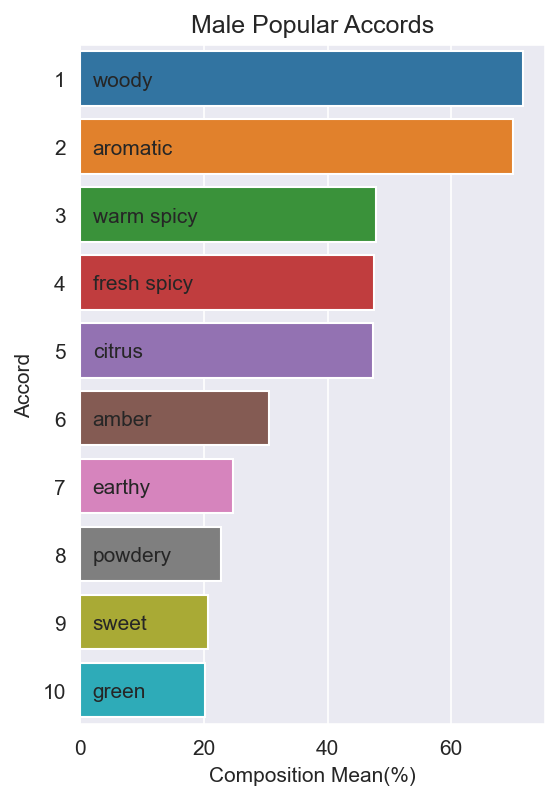

In [278]:
popular_accords = df_da[df_da.gender=='male'].fillna(0).mean().to_frame().reset_index().sort_values(0,ascending=False).head(10)
popular_accords['accord'] = popular_accords['index'].str.replace('accord-','')
popular_accords['no'] = [str(x) for x in range(1,11)]
draw_bar(popular_accords,0,'no','Male Popular Accords','Composition Mean(%)','Accord','accord',2)

# Accord Correlation

In [273]:
df_da_corr = df_da[df_da.gender=='male'].corr()
df_da_corr
# sns.heatmap(df_da[df_da.gender=='male'].corr(), cmap="YlGnBu")

,accord-aromatic,accord-woody,accord-citrus,accord-fresh spicy,accord-musky,accord-fresh,accord-earthy,accord-powdery,accord-conifer,accord-sweet,...,accord-whiskey,accord-clay,accord-vodka,accord-mineral,accord-beeswax,accord-Champagne,accord-savory,accord-bitter,accord-terpenic,accord-vinyl
accord-aromatic,1.000000,0.138436,-0.344509,0.305536,0.018093,0.225863,-0.095750,-0.077789,-0.239775,-0.183125,...,NaN,NaN,NaN,0.599571,NaN,NaN,NaN,NaN,NaN,NaN
accord-woody,0.138436,1.000000,-0.189953,0.045031,-0.118341,0.299759,0.216149,0.034959,-0.231308,-0.141021,...,NaN,NaN,NaN,-0.983665,NaN,NaN,NaN,NaN,NaN,NaN
accord-citrus,-0.344509,-0.189953,1.000000,-0.194538,0.007614,-0.041258,0.244746,0.022526,0.263764,-0.276997,...,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
accord-fresh spicy,0.305536,0.045031,-0.194538,1.000000,0.050032,0.457041,0.021123,-0.010893,-0.045626,-0.044638,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
accord-musky,0.018093,-0.118341,0.007614,0.050032,1.000000,0.767212,-0.052444,0.583706,NaN,0.176227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
accord-Champagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accord-savory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accord-bitter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accord-terpenic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

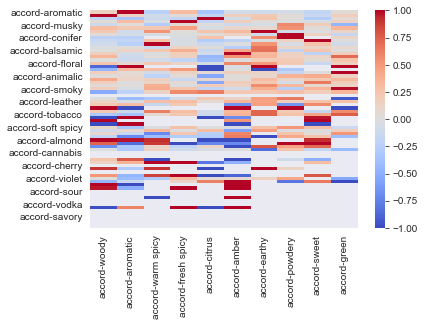

In [288]:
# df_da_corr['accord-aromatic'].sort_values(ascending=False)
sns.heatmap(df_da_corr[popular_accords['index']], cmap="coolwarm")

<AxesSubplot:>

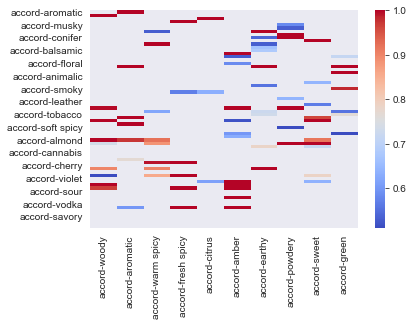

In [294]:
filtered_corr = df_da_corr[popular_accords['index']]
filtered_corr[filtered_corr  > 0.5]
sns.heatmap(filtered_corr[filtered_corr  > 0.5], cmap="coolwarm")

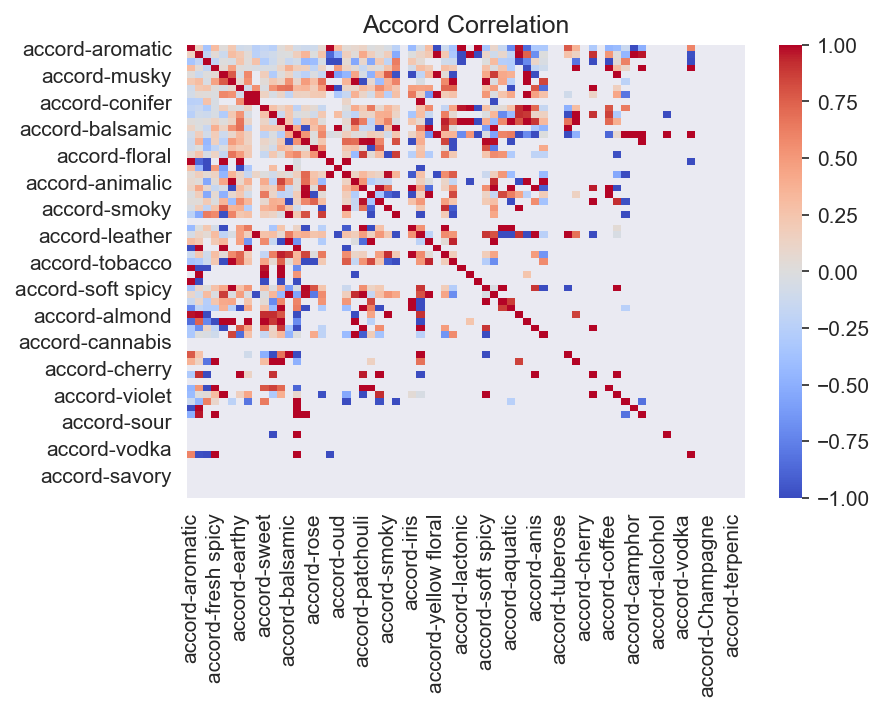

In [423]:
sns.heatmap(df_da_corr, cmap="coolwarm")
plt.gcf().set_dpi(150)
plt.title('Accord Correlation')
plt.show()

In [300]:
popular_accords_ls = (
    df_da[df_da.gender=='male'].fillna(0).mean().to_frame().reset_index().sort_values(0,ascending=False).head(10)['index'].to_list() +
    df_da[df_da.gender=='female'].fillna(0).mean().to_frame().reset_index().sort_values(0,ascending=False).head(10)['index'].to_list() +
    df_da[df_da.gender=='unisex'].fillna(0).mean().to_frame().reset_index().sort_values(0,ascending=False).head(10)['index'].to_list() 
)
popular_accords_ls = set(popular_accords_ls)
popular_accords_ls

{'accord-amber',
 'accord-aromatic',
 'accord-citrus',
 'accord-earthy',
 'accord-floral',
 'accord-fresh spicy',
 'accord-fruity',
 'accord-green',
 'accord-musky',
 'accord-powdery',
 'accord-sweet',
 'accord-vanilla',
 'accord-warm spicy',
 'accord-white floral',
 'accord-woody'}

In [424]:
print('Popular Accord Correlation')
mapping_popular_accords = []
for col in popular_accords_ls:
    neg_corr = df_da_corr[popular_accords_ls][col].sort_values().index.to_list()
    pos_corr = df_da_corr[popular_accords_ls][col].sort_values(ascending=False).index.to_list()
    
    neg_corr.remove(col)
    pos_corr.remove(col)
    neg_corr = [x.replace('accord-','') for x in neg_corr][:5]
    pos_corr = [x.replace('accord-','') for x in pos_corr][:5]
    col = col.replace('accord-','')
    mapping_popular_accords.append({'accord':col,'negative_corr':neg_corr,'positive_cor':pos_corr})
pd.DataFrame(mapping_popular_accords)

Popular Accord Correlation


,accord,negative_corr,positive_cor
0,powdery,"[marine, honey, oud, smoky, balsamic]","[conifer, tropical, yellow floral, iris, musky]"
1,floral,"[smoky, violet, animalic, aquatic, honey]","[patchouli, aldehydic, fresh, mossy, amber]"
2,earthy,"[aquatic, oud, cinnamon, aromatic, powdery]","[metallic, cacao, anis, tobacco, mossy]"
3,white floral,"[aquatic, balsamic, iris, tobacco, citrus]","[fruity, salty, patchouli, soft spicy, herbal]"
4,sweet,"[caramel, rum, citrus, amber, aromatic]","[coconut, tropical, lactonic, almond, coffee]"
5,green,"[marine, yellow floral, iris, violet, musky]","[metallic, smoky, tobacco, white floral, mossy]"
6,warm spicy,"[rum, whiskey, ozonic, aquatic, iris]","[nutty, almond, cacao, tropical, coffee]"
7,vanilla,"[caramel, honey, herbal, amber, fruity]","[aquatic, lactonic, coconut, tropical, nutty]"
8,musky,"[anis, iris, tobacco, aldehydic, oud]","[tropical, yellow floral, violet, metallic, he..."
9,aromatic,"[yellow floral, camphor, tropical, aquatic, sa...","[caramel, lactonic, metallic, almond, rum]"


# Popular Notes

In [338]:
perfume_df = df.drop_duplicates(subset=['href'])

for col in perfume_df:
    if 'notes' in col:
        print(col,perfume_df[perfume_df[col].notnull()].size)

Top-notes 26180
Middle-notes 26488
Base-notes 26600
Fragrance-notes 3500
Green-notes 2240
Woody-notes 756
Sea-notes 224
Fruity-notes 616
Spicy-notes 364
Sweet-notes 56
Woodsy-notes 700
Watery-notes 112
Water-notes 84
Powdery-notes 168
Herbal-notes 56
Floral-notes 28
Earthy-notes 28


In [371]:
import importlib
importlib.reload(plt)

<module 'matplotlib.pyplot' from 'c:\\Users\\yosia\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [391]:
def get_fav_notes(df,gender,note_position,title,size):
    col_notes = []
    for notes in df[df.gender==gender][note_position]:
        if type(notes) == list:
            col_notes.extend(notes)
    notes_df = pd.DataFrame(col_notes).value_counts()
    colors = sns.color_palette('pastel')[0:7]

    notes_value = list(notes_df.head(size).values)
    notes_label = notes_df.head(size).index.to_list()
    notes_value.append(notes_df.tail(-size).sum())
    notes_label.append(('other',))
    notes_label = [x[0] for x in notes_label]

    plt.gcf().set_dpi(150)
    plt.pie(notes_value, labels = notes_label, colors = colors, autopct='%.0f%%')
    plt.title(title)

    plt.show()


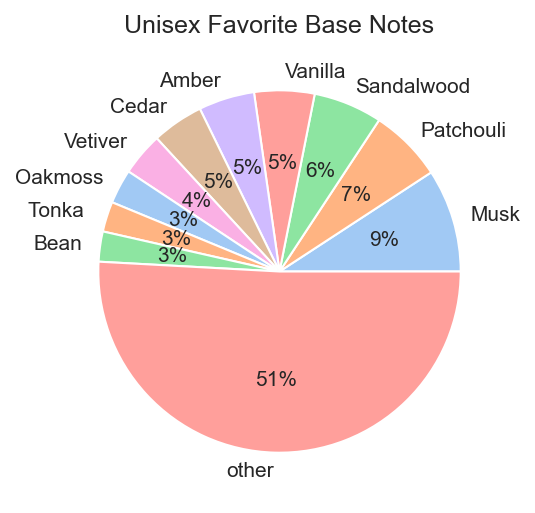

In [402]:
get_fav_notes(perfume_df,'unisex','Base-notes','Unisex Favorite Base Notes',10)

In [414]:
def notes_trend(df,gender):
    df_temp = df[df.gender==gender]
    docs = []
    for position in ['Top-notes','Middle-notes','Base-notes']:
        doc = {'notes':position.replace('-notes','')}
        for year in [2018,2019,2020,2021,2022]:
            df_year = df_temp[df_temp.year==year]
            col_notes = []
            for notes in df_year[position]:
                if type(notes) == list:
                    col_notes.extend(notes)
            notes = pd.DataFrame(col_notes).value_counts().head(3).index.to_list()
            notes = [x[-1] for x in notes]
            doc[year]=notes
        docs.append(doc)
    return pd.DataFrame(docs)
            
                    


# Notes Trend

In [425]:
print('Male Notes Trend')
notes_trend(perfume_df,'male')

Male Notes Trend


,notes,2018,2019,2020,2021,2022
0,Top,"[Bergamot, Mandarin , Orange]","[Bergamot, Lemon, Mandarin]","[Bergamot, Pink , Almond]","[Bergamot, Cardamom, Sage]","[Bergamot, Lemon, Orange]"
1,Middle,"[Geranium, Lavender, Rose]","[Leather, Blossom, Mineral notes]","[Atlas , Cashmere , Cedar]","[Lavender, Bean, Caramel]","[Aldehydes, Berries, Timur]"
2,Base,"[Vanilla, Cedar, Patchouli]","[Bean, Tonka , Amber]","[Cedar, E , Haitian ]","[Vetiver, Patchouli, Haitian ]","[Amber, Ambergris, Tonka ]"


In [426]:
print('Female Notes Trend')
notes_trend(perfume_df,'female')

Female Notes Trend


,notes,2018,2019,2020,2021,2022
0,Top,"[Bergamot, Orange, Mandarin ]","[Pear, Bergamot, Black ]","[Mandarin , Bergamot, Orange]","[Orange, Mandarin , Red ]","[Bergamot, Pear, Almond]"
1,Middle,"[Rose, Jasmine, Coconut]","[Rose, Jasmine, Blossom]","[Orange , Jasmine, Blossom]","[Jasmine, Rose, Orange ]","[Jasmine, Blossom, Orange ]"
2,Base,"[Musk, Vanilla, Patchouli]","[Musk, Vanilla, Cedar]","[Vanilla, Musk, Cedar]","[Vanilla, Sandalwood, Patchouli]","[Vanilla, Bourbon , Amber]"


In [427]:
print('Unisex Notes Trend')
notes_trend(perfume_df,'unisex')

Unisex Notes Trend


,notes,2018,2019,2020,2021,2022
0,Top,"[Almond, Bergamot, Bitter ]","[Pepper, Bergamot, Black ]","[Bergamot, Cognac, Lemon]","[Cardamom, Pear, Pepper]","[Bergamot, Jasmine, Burning ]"
1,Middle,"[Jasmine , Sambac, Cherry]","[Bean, Milk, Turkish ]","[Amber, Bean, Cinnamon]","[Ambroxan, Carrot , Maple]","[Blossom, Cyclamen, Damask ]"
2,Base,"[Patchouli, Amber, Amberwood]","[Cedar, Sandalwood, Vanilla]","[Sandalwood, Vanilla, Madagascar ]","[Ambrettolide, Cedar, Moss]","[Wood, White , Musk]"
